<a href="https://colab.research.google.com/github/eleciawhite/origami/blob/main/LukashevaCurved/OrigamiSignals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This script explores how origami can be made of different mathematical functions and rotations. It is not intended to be used by anyone by me (Elecia White). If you do end up here, you may want to look at my [KateTess colab](https://colab.research.google.com/drive/1fzYIjLuT9UMiUwyxtAOIls0isZT1IvX4?usp=sharing) first as there is some overlap in functions and that is better documented. Or at my [YoshiSines colab](https://colab.research.google.com/drive/1OE3RBsKrw5A8SIV6d2B1cbP3igKiKiIU?usp=sharing) if that is what you are looking for.

In [ ]:
from math import *
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import collections  as mc
from matplotlib.patches import Ellipse, Wedge, Polygon
from matplotlib.path import Path
import matplotlib
import itertools

from scipy.spatial import distance
from scipy import signal
import scipy
from google.colab import files


I want to be able to use the Amanda Ghassaei's [Origami Simulator](https://origamisimulator.org/) to test the output of the script. 

In this next block, I'm fixing up the matplotlib output to be more compatible with the simulator.

In [ ]:
indef = False
def rm_clippath(line):
  global indef

  if not indef:
    f = line.find('<clipPath')
  else:
    f = line.find('</clipPath>')
  if f >= 0:
    indef = not indef
    return ""
  if indef: return ""

  f = line.find('clip-path')
  if (f < 0): return line
  fc = line.find('"', f) + 1
  fe = line.find('"', fc) +1
  return line[:f]+line[fe:]

def fixup_svg(infile):
  global indef
  indef = False
  outfile = "kt_"+ infile
  replace_list = [['fill:none;',""], ['style="fill:#ffffff;"/>','style="fill:none;stroke:#000000"/>' ]]
  with open(infile) as fin, open(outfile, "w+") as fout:
    for line in fin:
      line = rm_clippath(line)
      for pair in replace_list:
        line = line.replace(pair[0], pair[1])
      fout.write(line)
  return outfile

def save_fig(name):
#  plt.axis('equal') # sometimes you need this but you can put it before save_fig
  plt.axis('off')
  plt.savefig(name + ".svg", bbox_inches = 'tight')
  outputfilename = fixup_svg(name + ".svg")
  files.download(outputfilename)

I want a signal that is a sine wave inside a gassian. This turns out not to have any application yet but it would make the center open and harder to fold with the edges compressible, like a wrapper on a candy.

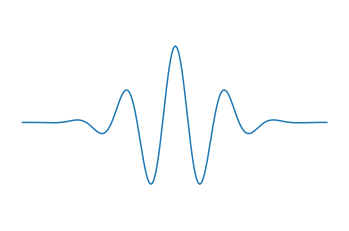

In [ ]:
edge = 0.6
amplitude = 0.3
download = False

t = np.linspace(-edge, edge, 2 * 100, endpoint=False)
i, q, e = signal.gausspulse(t, fc=5, retquad=True, retenv=True)
x = amplitude * i
plt.plot(t, x)

plt.axis('equal')
plt.axis('off')

name = "gausspulse"
plt.savefig(name + ".svg")
outputfilename = fixup_svg(name + ".svg")
if (download): files.download(outputfilename)


Chirps are kind of the opposide of a sine-contained-in-a-gaussian. These have a lot of applications in my origami as (when mirrored) they make the center very compressible (and rotatable) but the edges are curvy and fixed. 

To make a foldable origami from this, take the SVG and replicate it several times. A smaller amplitude is likely to work best but I tend to do that as I build the project. Here is a [Cricut Project.](https://design.cricut.com/landing/project-detail/637b9916f431d6b2923ef566) with pictures of partially complete and the full rotation and compression.

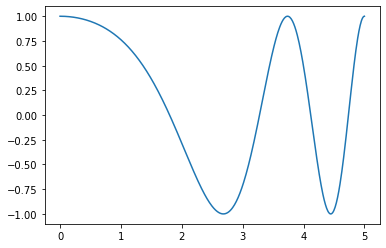

In [ ]:
t = np.linspace(0, 5, 500)

wq = signal.chirp(t, f0=0.1, f1=1, t1=5, method='quadratic')
plt.plot(t, wq)
if (download): save_fig("chirp01_1_quadratic")

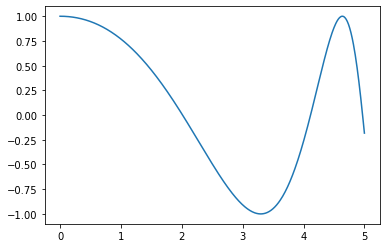

In [ ]:
t = np.linspace(0, 5, 500)

wh = signal.chirp(t, f0=0.1, f1=1, t1=5, method='hyperbolic')
plt.plot(t, wh)
if (download): save_fig("chirp01_1_hyperbolic")


The next function rotates a signal around a point. This is usually added to a new signal.

In [ ]:
def rotate(p, origin=(0, 0), degrees=0):
    angle = np.deg2rad(degrees)
    R = np.array([[np.cos(angle), -np.sin(angle)],
                  [np.sin(angle),  np.cos(angle)]])
    o = np.atleast_2d(origin)
    p = np.atleast_2d(p)
    return np.squeeze((R @ (p.T-o.T) + o.T).T)

Below is a nice wave pattern, generated from chirps rotated around point that is off screen. Note that this clips the signal so it fits in a particular frame. This pattern works well in the Origami Simulator. Here is a [Cricut Project](https://design.cricut.com/landing/project-detail/63a2771bb3466a71efaf57aa) with a pic and the pattern imported.

[-1.          1.23461043]


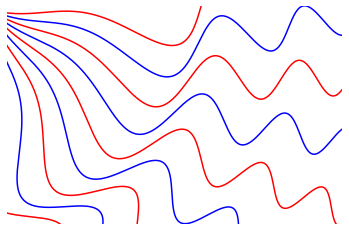

In [ ]:
t = np.linspace(-1, 8, 500)
y2 =5/((t+3))
wl = 0.5*signal.chirp(t, f0=0.1, f1=1, t1=6, method='linear')

falling_chirp= wl*y2

xr = np.hstack((np.vstack(t), np.vstack(falling_chirp)))
origin=(xr[0])
xr = rotate(xr, origin=origin, degrees=30)
total_angle = 0
angle = 10
color = 'b'
while (total_angle <= 80):
  if color == 'b':
    color = 'r'
  else:
    color = 'b'
  xr = rotate(xr, origin=origin, degrees=-angle)
  plt.plot(xr[:,0], xr[:, 1], color) 
  total_angle += angle

print(origin)
plt.axis('equal')
plt.ylim([-2.15, 0.85])
plt.xlim([-0.7, 5.3])
plt.axis('off')
#plt.axis('on')
if (download): save_fig("waves1")
# This turns out pretty good, a lot of stress around that first sharp turn but 
# overall, very nice

The following pattern is NOT good, too much interference between the straights and curves. 

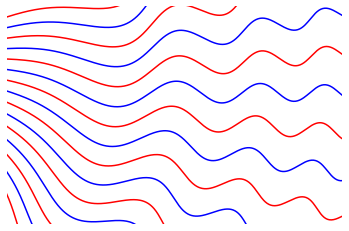

In [ ]:
# Another take on waves

t = np.linspace(-1, 8, 500)
y2 =5/((t+3))
wl = 0.25*signal.chirp(t, f0=0.1, f1=1, t1=6, method='linear')

falling_chirp= wl*y2

xr = np.hstack((np.vstack(t), np.vstack(falling_chirp)))
origin=(xr[0])
xr = rotate(xr, origin=origin, degrees=30)
total_angle = 0
angle = 5
color = 'b'
while (total_angle <= 80):
  if color == 'b':
    color = 'r'
  else:
    color = 'b'
  xr[:,1] = xr[:,1] - 0.1
  origin=(xr[0])
  xr = rotate(xr, origin=origin, degrees=-angle)
  plt.plot(xr[:,0], xr[:, 1], color) 
  total_angle += angle

  
plt.axis('equal')
plt.ylim([-2.5, 0.5])
plt.xlim([0, 6])
plt.axis('off')
#plt.axis('on')
if (download): save_fig("waves2")
# This is not as good as previous, the sine areas fight each other

Sine waves that move in different ways are interesting. This has a sine wave added to a binomial as I started to explore sine waves of sine waves. This didn't turn out to have a lot of utility but I do have a nice [Cricut Project](https://design.cricut.com/landing/project-detail/631256e2fc3f79a4ca39b3f2) of simple sine waves.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

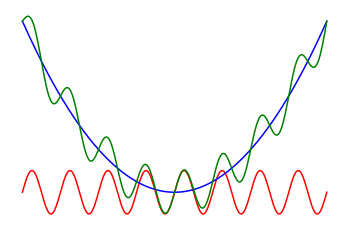

In [ ]:
# Define the x-values for the two signals
x = np.linspace(-2*np.pi, 2*np.pi, 500)

# Define the two signals
y1 = np.sin(4*x)
y2 =(1/5)* x**2

# add them together
y3 = y1+y2

# Plot the resulting signal
plt.plot(x, y1, 'r', x, y2,'b', x, y3, 'g')
if (download): save_fig("sin4x_plus_02xsq")

In [ ]:
# Bezier output 
!pip install svgpathtools
import svgpathtools


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.4/67.4 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 KB 6.6 MB/s eta 0:00:00


In [ ]:
from svgpathtools import svg2paths2
from svgpathtools import smoothed_path
import svgpathtools

paths, attributes, svg_attributes = svg2paths2('sin4x_plus_02xsq.svg')

In [ ]:


print("Starting: {} paths", len(paths))
for i in range(len(paths)):
  if 'style' in attributes[i]:
    print("  {}  len {} style {}".format(i, len(paths[i]), attributes[i]['style']))
  else:
    print("  {}  len {} ".format(i, len(paths[i])))
#  s = smoothed_path(paths[i])
#  print("    smoothed  len {} ".format(i, len(s)))


Starting: {} paths 5
  0  len 4 style fill:#ffffff;
  1  len 263 style fill:none;stroke:#ff0000;stroke-linecap:square;stroke-width:1.5;
  2  len 66 style fill:none;stroke:#0000ff;stroke-linecap:square;stroke-width:1.5;
  3  len 264 style fill:none;stroke:#008000;stroke-linecap:square;stroke-width:1.5;
  4  len 4 


In [ ]:
# for each path whose len >4
  # for each Line in the path
    # points.append( [line.start.real , line.start.imag])
    # if current.end != next.end
      # points.append(end)
  # feed the data into get_bezier_parameters
  # create a Quadratic Bezier with svgpathtools
  # wsvg on output

data = get_bezier_parameters(xpoints, ypoints, degree=4)
x_val = [x[0] for x in data]
y_val = [x[1] for x in data]

xvals, yvals = bezier_curve(data, nTimes=1000)
plt.plot(xvals, yvals, 'b-', label='B Curve')


(22.418182+22.024578j)

In [ ]:
s = smoothed_path(paths[2])
print(len(s), len(paths[2]))

129 65


In [ ]:
p = 3
for i in range(len(paths[p])):
  if paths[p][i].start == paths[p][i].end:
      print(i)
      paths[p].remove(paths[p][i])


In [ ]:
#https://stackoverflow.com/questions/12643079/bézier-curve-fitting-with-scipy

import numpy as np
from scipy.special import comb

def get_bezier_parameters(X, Y, degree=3):
    """ Least square qbezier fit using penrose pseudoinverse.

    Parameters:

    X: array of x data.
    Y: array of y data. Y[0] is the y point for X[0].
    degree: degree of the Bézier curve. 2 for quadratic, 3 for cubic.

    Based on https://stackoverflow.com/questions/12643079/b%C3%A9zier-curve-fitting-with-scipy
    and probably on the 1998 thesis by Tim Andrew Pastva, "Bézier Curve Fitting".
    """
    if degree < 1:
        raise ValueError('degree must be 1 or greater.')

    if len(X) != len(Y):
        raise ValueError('X and Y must be of the same length.')

    if len(X) < degree + 1:
        raise ValueError(f'There must be at least {degree + 1} points to '
                         f'determine the parameters of a degree {degree} curve. '
                         f'Got only {len(X)} points.')

    def bpoly(n, t, k):
        """ Bernstein polynomial when a = 0 and b = 1. """
        return t ** k * (1 - t) ** (n - k) * comb(n, k)
        #return comb(n, i) * ( t**(n-i) ) * (1 - t)**i

    def bmatrix(T):
        """ Bernstein matrix for Bézier curves. """
        return np.matrix([[bpoly(degree, t, k) for k in range(degree + 1)] for t in T])

    def least_square_fit(points, M):
        M_ = np.linalg.pinv(M)
        return M_ * points

    T = np.linspace(0, 1, len(X))
    M = bmatrix(T)
    points = np.array(list(zip(X, Y)))
    
    final = least_square_fit(points, M).tolist()
    final[0] = [X[0], Y[0]]
    final[len(final)-1] = [X[len(X)-1], Y[len(Y)-1]]
    return final
def bernstein_poly(i, n, t):
    """
     The Bernstein polynomial of n, i as a function of t
    """
    return comb(n, i) * ( t**(n-i) ) * (1 - t)**i


def bezier_curve(points, nTimes=50):
    """
       Given a set of control points, return the
       bezier curve defined by the control points.

       points should be a list of lists, or list of tuples
       such as [ [1,1], 
                 [2,3], 
                 [4,5], ..[Xn, Yn] ]
        nTimes is the number of time steps, defaults to 1000

        See http://processingjs.nihongoresources.com/bezierinfo/
    """

    nPoints = len(points)
    xPoints = np.array([p[0] for p in points])
    yPoints = np.array([p[1] for p in points])

    t = np.linspace(0.0, 1.0, nTimes)

    polynomial_array = np.array([ bernstein_poly(i, nPoints-1, t) for i in range(0, nPoints)   ])

    xvals = np.dot(xPoints, polynomial_array)
    yvals = np.dot(yPoints, polynomial_array)

    return xvals, yvals




In [ ]:
points = []
xpoints = [19.21270, 19.21269, 19.21268, 19.21266, 19.21264, 19.21263, 19.21261, 19.21261, 19.21264, 19.21268,19.21274, 19.21282, 19.21290, 19.21299, 19.21307, 19.21316, 19.21324, 19.21333, 19.21342]
ypoints = [-100.14895, -100.14885, -100.14875, -100.14865, -100.14855, -100.14847, -100.14840, -100.14832, -100.14827, -100.14823, -100.14818, -100.14818, -100.14818, -100.14818, -100.14819, -100.14819, -100.14819, -100.14820, -100.14820]
for i in range(len(xpoints)):
    points.append([xpoints[i],ypoints[i]])

[[19.2127, -100.14895], [19.21269253408782, -100.14851871628683], [19.212244684681664, -100.14789676091237], [19.213163415737142, -100.14825934814728], [19.21342, -100.1482]]


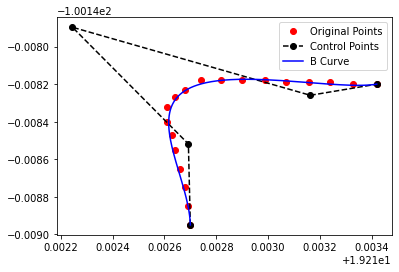

In [ ]:
import matplotlib.pyplot as plt
# Plot the original points
plt.plot(xpoints, ypoints, "ro",label='Original Points')
# Get the Bezier parameters based on a degree.
data = get_bezier_parameters(xpoints, ypoints, degree=4)
x_val = [x[0] for x in data]
y_val = [x[1] for x in data]
print(data)
# Plot the control points
plt.plot(x_val,y_val,'k--o', label='Control Points')
# Plot the resulting Bezier curve
xvals, yvals = bezier_curve(data, nTimes=1000)
plt.plot(xvals, yvals, 'b-', label='B Curve')
plt.legend()
plt.show()

In [ ]:
print(len(xpoints), len(x_val), len(xvals))

19 5 1000


In [ ]:
print(x_val)

[19.2127, 19.21269253408782, 19.212244684681664, 19.213163415737142, 19.21342]


In [ ]:
print(y_val)

[-100.14895, -100.14851871628683, -100.14789676091237, -100.14825934814728, -100.1482]


In [ ]:
print(data)



[[19.2127, -100.14895], [19.21269253408782, -100.14851871628683], [19.212244684681664, -100.14789676091237], [19.213163415737142, -100.14825934814728], [19.21342, -100.1482]]
